# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
Dataset berasal kaggle yang dapat dikunjungi pada link berikut:
https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

2. **Penjelasan Tentang Dataset**:  
Dataset ini menyajikan wawasan mendalam tentang perilaku manusia, seperti waktu yang dihabiskan sendirian, keikutsertaan dalam acara sosial, dan interaksi di media sosial. Informasi ini sangat berguna untuk berbagai bidang seperti psikologi, sosiologi, pemasaran, hingga machine learning. Baik Anda ingin memprediksi tipe kepribadian maupun menganalisis pola sosial, dataset ini merupakan pintu gerbang menuju berbagai temuan yang menarik dan bermakna.

# **2. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split


# **3. Memuat Dataset**

In [2]:
data = pd.read_csv("../personality_dataset.csv")
data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


# **4. Exploratory Data Analysis (EDA)**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


Dataset memiliki 8 kolom dengan 2 jenis kolom yaitu kategorikal dan numerikal dan kolom terakhir sebagai target jika kita ingin membuat klasifikasi personaliti. Dapat dilihat bahwa tidak semua kolom terbebas dari nilai kosong.

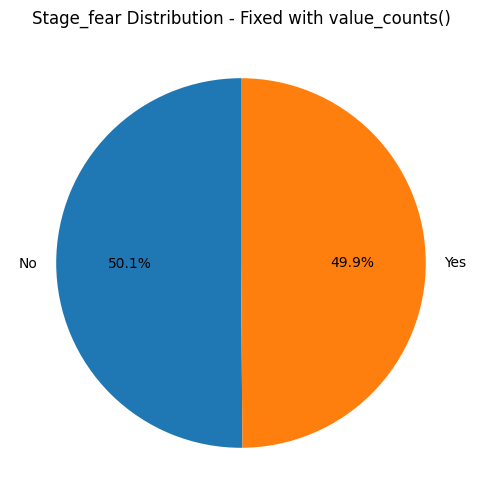

In [4]:
plt.figure(figsize=(8, 6))
data['Stage_fear'].value_counts().plot.pie(
    autopct='%1.1f%%',
    title='Stage_fear Distribution - Fixed with value_counts()',
    startangle=90
)

plt.ylabel('')
plt.show()

Pada kolom stage_fear persebaran sangat seimbang dan hampir sempurna dengan nilai unik "Yes" dan "No"

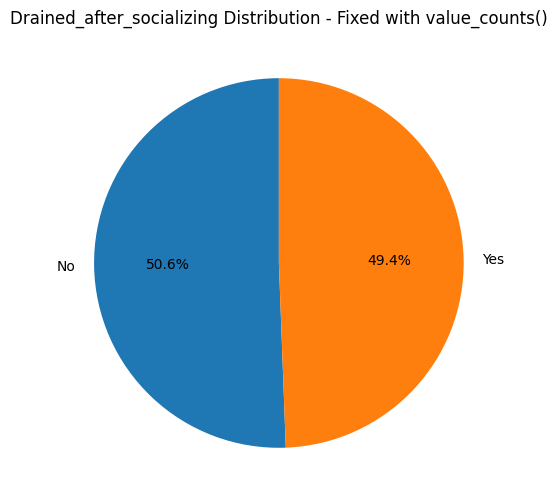

In [5]:
plt.figure(figsize=(8, 6))
data['Drained_after_socializing'].value_counts().plot.pie(
    autopct='%1.1f%%',
    title='Drained_after_socializing Distribution - Fixed with value_counts()',
    startangle=90
)

plt.ylabel('')
plt.show()

Pada kolom Drained_after_socializing persebaran sangat seimbang dan hampir sempurna dengan nilai unik "Yes" dan "No"

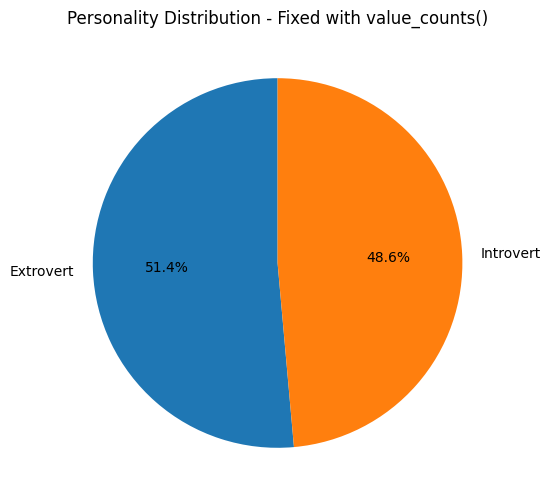

In [6]:
plt.figure(figsize=(8, 6))
data['Personality'].value_counts().plot.pie(
    autopct='%1.1f%%',
    title='Personality Distribution - Fixed with value_counts()',
    startangle=90
)

plt.ylabel('')
plt.show()

Pada kolom target "Personality" persebaran sangat seimbang dan hampir sempurna dengan nilai unik "Extrovert" dan "Introvert"

In [7]:
le = LabelEncoder()
data["Personality"] = le.fit_transform(data["Personality"])

Kita bisa mengubah terlebih dahulu kolom target ntuk melihat korelasinya dengan kolom-kolom numerik. 

In [8]:
numerical_cols = data.select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

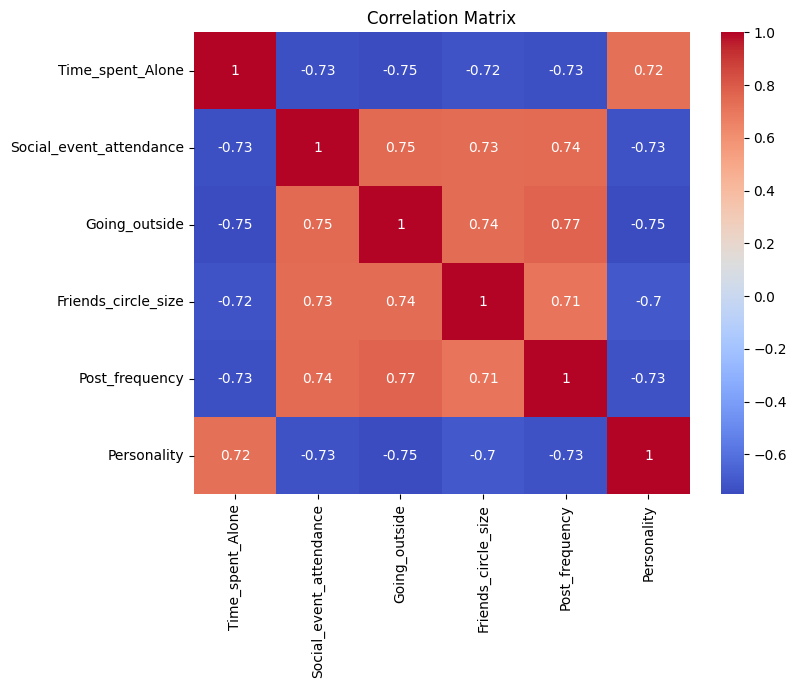

In [9]:
plt.figure(figsize=(8, 6))
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari heatmap diatas dapat dilihat bahwa kolom-kolom numerik memeliki korelasi yang cukup kuat dengan nilai diatas 70%.

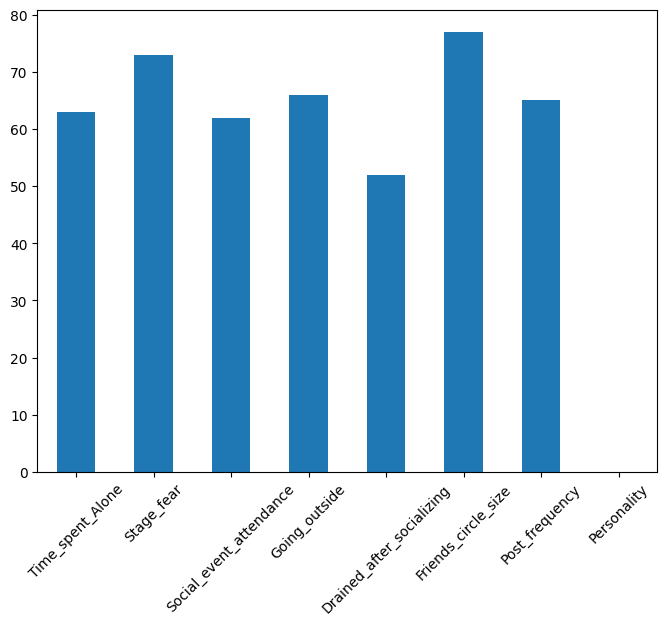

In [10]:
plt.figure(figsize=(8, 6))
data.isnull().sum().plot.bar(rot=45)
plt.show()

Menggunakan diagram batang dapat dilihat bahwa beberapa kolom masih memiliki missing value.

In [11]:
data.duplicated().sum()

np.int64(388)

Jumlah data duplikatpun pada dataset juga cukup besar, hal ini tentunya membutuhkan penanganan lebih lanjut

# **5. Data Preprocessing**

In [12]:
numerical_cols = data.select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
target_col = numerical_cols.pop()

In [13]:
# Kode untuk menghilangkan missing value dan data duplikat
data_clean = data.dropna()
data_clean = data_clean.drop_duplicates()

In [14]:
# Kode untuk menghilangkan outliers
for feature in numerical_cols:
    Q1 = data_clean[feature].quantile(0.25)
    Q3 = data_clean[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_clean = data_clean[(data_clean[feature] >= lower_bound) & (data_clean[feature] <= upper_bound)]

In [15]:
# Melakukan normalisasi untuk data numerik dan encoding pada data kategorikal
scaler = StandardScaler()
encoder_features = LabelEncoder()
encoder_features = encoder_features.fit(data_clean[categorical_cols[0]].tolist())

In [16]:
# Menerapkan encoding pada semua kolom kategorikal
for category in categorical_cols:
    data_clean[category] = encoder_features.transform(data_clean[category])
data_clean[numerical_cols + categorical_cols] = scaler.fit_transform(data_clean[numerical_cols + categorical_cols])

In [17]:
data_clean

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.053961,-0.888018,-0.078672,1.220902,-0.888018,1.466117,0.385809,0
1,1.393730,1.126103,-1.456988,-1.439886,1.126103,-1.520207,-0.291536,1
2,1.393730,1.126103,-1.112409,-0.552957,1.126103,-0.371621,-0.630208,1
3,-1.212114,-0.888018,0.610486,1.664367,-0.888018,1.695835,1.401826,0
4,-0.343499,-0.888018,1.644224,0.333972,-0.888018,0.317531,0.385809,0
...,...,...,...,...,...,...,...,...
2888,0.235578,1.126103,-1.456988,-0.996422,1.126103,-1.290490,-1.307553,1
2889,0.525116,1.126103,-1.456988,-1.439886,1.126103,-0.831055,-1.307553,1
2896,-0.343499,-0.888018,1.299645,-0.109492,-0.888018,1.695835,1.740498,0
2897,-0.053961,1.126103,-1.112409,-0.996422,1.126103,-0.601338,-1.307553,1


In [18]:
# Menyimpan dataset yang telah dibersihkan
data_clean.to_csv("personality_dataset_preprocessing.csv", index=False)